**Student Information**

*Name: 陳彥瑋*  
*Stusent ID: 112034574*  
*GitHub ID: IVesChen-CV*  

In [3]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline
# prepare dataset

#twenty_train = fetch_20newsgroups(subset='train', categories=sentiment, shuffle=True, random_state=42)

In [12]:
sentiment = ['nostalgia', 'not nostalgia']
df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
df
##raw_csv_data = np.loadtxt("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv", delimiter=",")

sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

In [13]:
!pip install pami
import PAMI


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [13]:
# category of first 10 documents.
twenty_train.target[0:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [16]:
for t in df.sentiment[:10]:
    print(t)

not nostalgia
nostalgia
nostalgia
not nostalgia
nostalgia
nostalgia
nostalgia
nostalgia
not nostalgia
not nostalgia


《Exercise 1》

In [20]:
X = df
for t in X["comment"][:2]:
    print(t)


He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


In [21]:
# a simple query
X[:10][["sentiment","comment"]]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart
9  not nostalgia  Elvis will always be number one no one can com...

In [22]:
X[-10:]

sentiment                                            comment
1490  not nostalgia  He really isn't my cup of tea, but some of his...
1491      nostalgia  real music...how i miss those days...brings ba...
1492      nostalgia  i used to cry over this song cause i had a boy...
1493  not nostalgia  He really has that "love you like a brother" l...
1494  not nostalgia  That's funny. But Leo really is a nice guy. He...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

In [23]:
# using loc (by label)
X.loc[:10, 'sentiment']

0     not nostalgia
1         nostalgia
2         nostalgia
3     not nostalgia
4         nostalgia
5         nostalgia
6         nostalgia
7         nostalgia
8     not nostalgia
9     not nostalgia
10    not nostalgia
Name: sentiment, dtype: object

Exercise 2

In [26]:
X.sample(n=3)

sentiment                                            comment
849      nostalgia  This song reminds me of long hot summers when ...
440  not nostalgia               Untouchable music very irreplaceable
469      nostalgia  Brings back so many memories. I remember my si...

Exercise 3

In [27]:
print(X[X['sentiment']=='nostalgia'].iloc[::10][0:5])

    sentiment                                            comment
1   nostalgia  The mist beautiful voice ever I listened to hi...
18  nostalgia  My Grandparents had a pub in the 1970's, this ...
32  nostalgia  I remember my Mom listening to Jim over and ov...
50  nostalgia  If I remember correctly, this song came out af...
71  nostalgia  Gosh does this bring back memories. Nearly eve...


In [28]:
# check missing values
X.isnull()

sentiment  comment
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
...         ...      ...
1495      False    False
1496      False    False
1497      False    False
1498      False    False
1499      False    False

[1500 rows x 2 columns]

In [30]:
# my functions
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

Exercise 4

In [31]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [32]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentiment", "comment"])
dummy_series

sentiment    dummy_record
comment                 1
dtype: object

In [33]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T -> Transpose

sentiment comment
0  dummy_record       1

In [34]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [35]:
len(result_with_series)

1501

In [36]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

> Exercise 5

In [37]:
import numpy as np
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
{ 'id': 'B' },
{ 'id': 'C', 'missing_example': 'NaN' },
{ 'id': 'D', 'missing_example': 'None' },
{ 'id': 'E', 'missing_example': None },
{ 'id': 'F', 'missing_example': '' }]
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df


id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [38]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [60]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

## **5.Data Preprocessing**

In [40]:
X_sample = X.sample(n=500) #random state
len(X_sample)

500

In [41]:
X_sample[0:4]

sentiment                                            comment
96   not nostalgia  Why many of the great great  singers never liv...
639  not nostalgia  Can anyone tell me  who is the first actress f...
55       nostalgia  i am 47 from Western Australia. My husband jus...
213  not nostalgia  I adore this song. Elvis the biggest singer in...

**Exerecise 6**

In [42]:
#Notice any changes from the X dataframe to the X_sample dataframe? What are they? 
#Report every change you noticed as #compared to the previous state of X . 
#Feel free to query and look more closely at the dataframe for these changes.
print("The percenteage of label of alt.atheism in X and X_sample:")
print(len(X[X['sentiment']=='nostalgia'])/len(X),len(X_sample[X_sample['sentiment']=='nostalgia'])/len(X_sample))
print("The percenteage of label of comp.graphics in X and X_sample:")
print(len(X[X['sentiment']=='not nostalgia'])/len(X),len(X_sample[X_sample['sentiment']=='not nostalgia'])/len(X_sample))

The percenteage of label of alt.atheism in X and X_sample:
0.5 0.492
The percenteage of label of comp.graphics in X and X_sample:
0.5 0.508


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

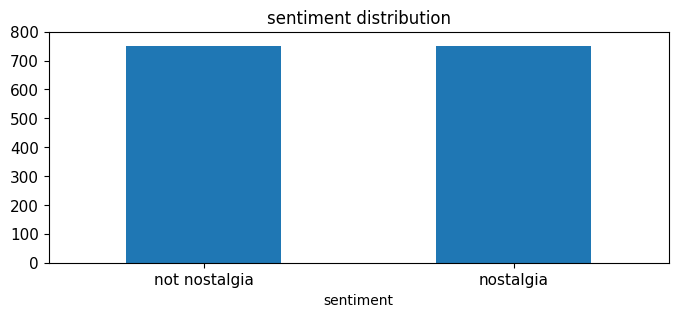

In [47]:
print(X.sentiment.value_counts())
# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
title = 'sentiment distribution',
ylim = [0, 800],
rot = 0, fontsize = 11, figsize = (8,3))

sentiment
not nostalgia    254
nostalgia        246
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

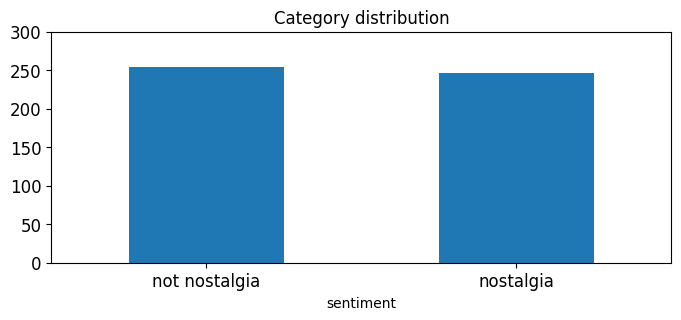

In [48]:
print(X_sample.sentiment.value_counts())
# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
title = 'Category distribution',
ylim = [0, 300],
rot = 0, fontsize = 12, figsize = (8,3))


**《Exerecise 7》**

sentiment
not nostalgia    254
nostalgia        246
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

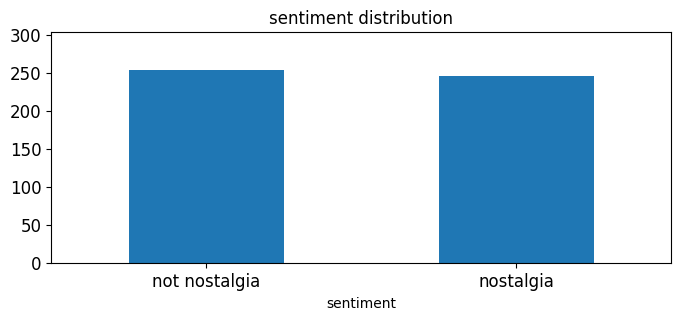

In [49]:
upper_bound = max(X_sample.sentiment.value_counts()+50)
print(X_sample.sentiment.value_counts())
# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
title = 'sentiment distribution',
ylim = [0, upper_bound],
rot = 0, fontsize = 12, figsize = (8,3))

**《Exerecise 8》**

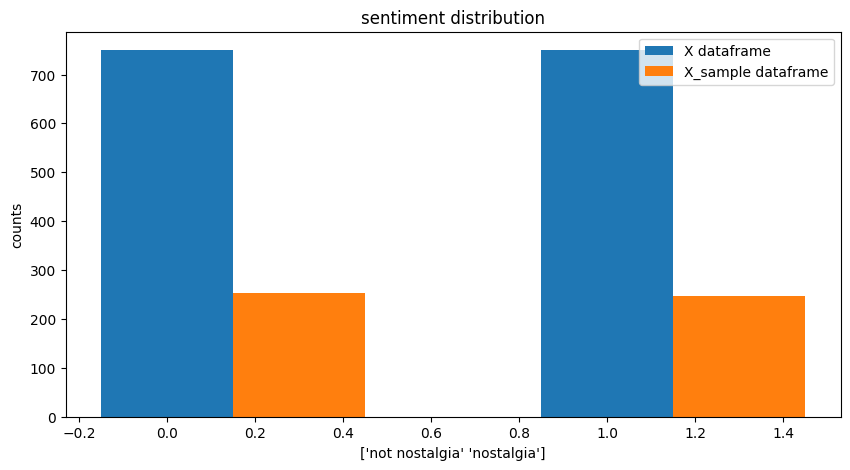

In [51]:
#We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. 
#Below we show you an snapshot of the type of chart we are looking for.
# Numbers of pairs of bars you want
N = 2
# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (X.sentiment.value_counts())
# Specify the values of orange bars (height)
orange_bar = (X_sample.sentiment.value_counts())

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='X dataframe')
plt.bar(ind + width, orange_bar, width, label='X_sample dataframe')

plt.xlabel(X.sentiment.unique())
plt.ylabel('counts')
plt.title('sentiment distribution')


# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [52]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yuyulu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [54]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [55]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [56]:
X[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [103]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])


  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [58]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

**《Exerecise 9》**

In [62]:
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

**《Exerecise 10》**

In [63]:
count_vect.get_feature_names_out()[38]

'1967'

In [64]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

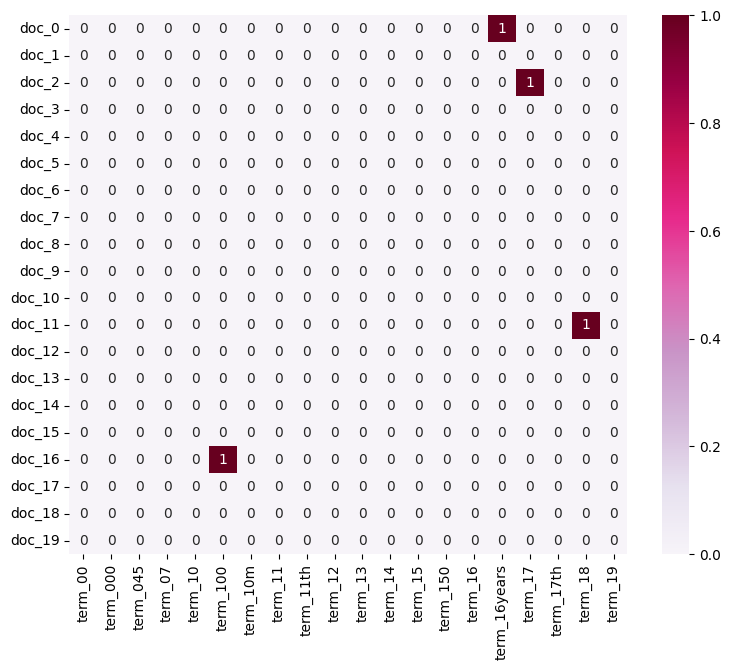

In [65]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
cmap="PuRd",
vmin=0, vmax=1, annot=True)

**《Exerecise 11》**

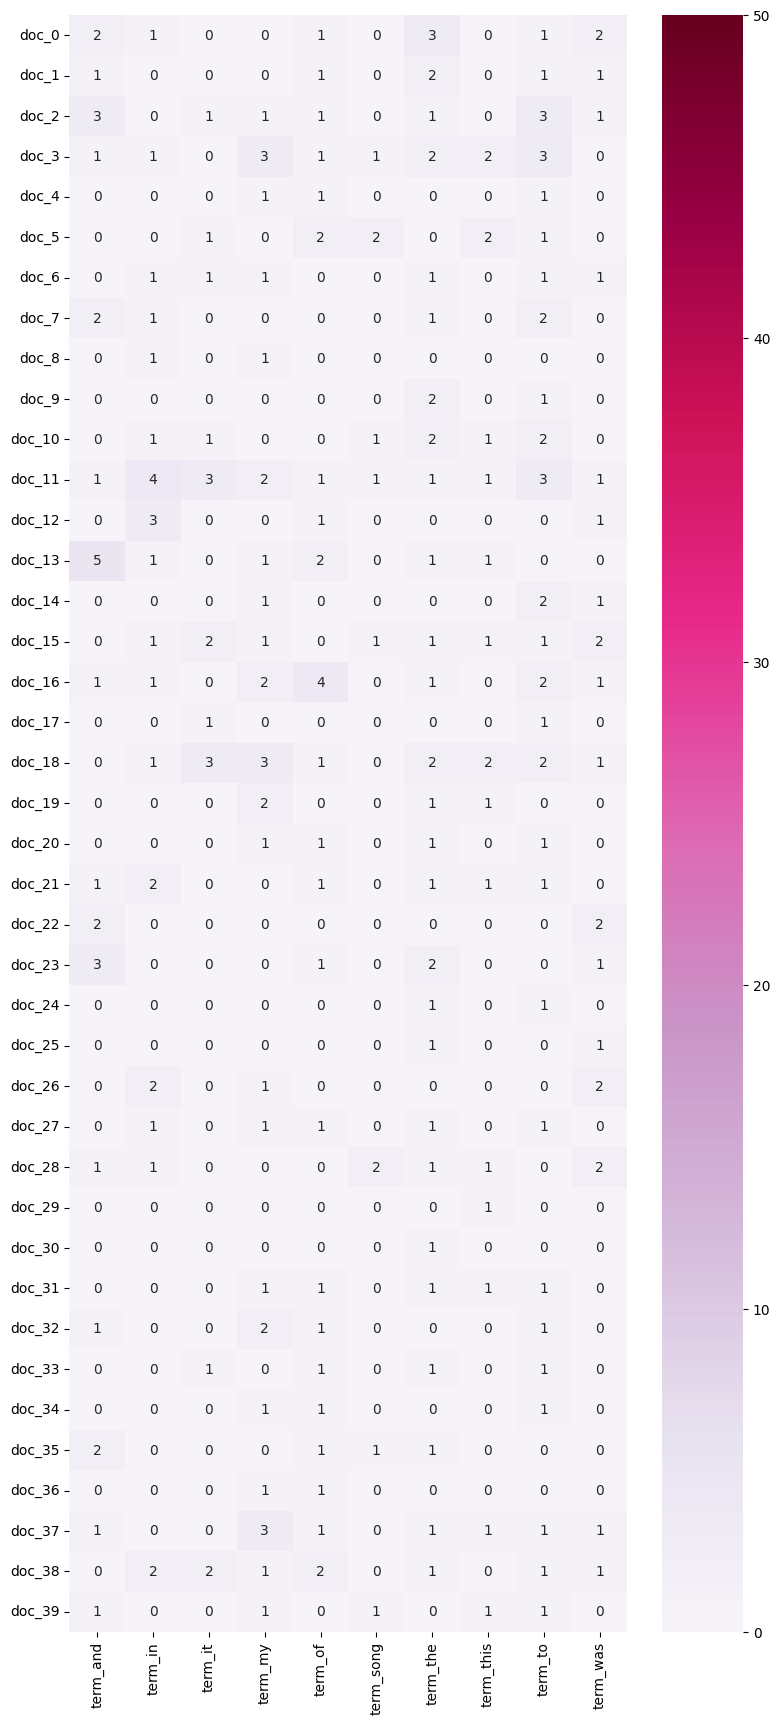

In [67]:
##chose the most common term in TDM, and plot the heatmap.
vectorizer = CountVectorizer(max_features=10)  # Limit to top 50 features for efficiency
term_doc_matrix = vectorizer.fit_transform(X.comment)

plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[0:10]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:40]]
plot_z = term_doc_matrix[0:40, 0:10].toarray() #
plot_z
# Display a summary of the term-document matrix
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 21))
ax = sns.heatmap(df_todraw,
cmap="PuRd",
vmin=0, vmax=50, annot=True)


In [68]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [69]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_44996\3453781580.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


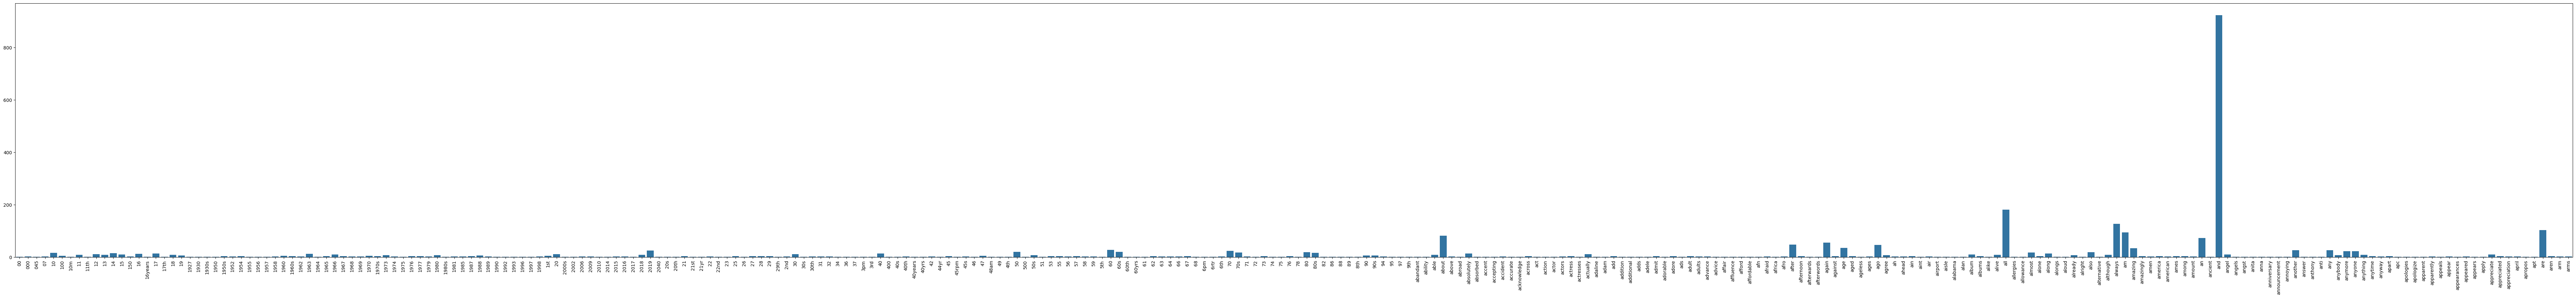

In [71]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [72]:
!pip install plotly.express


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**《Exercise 12》**

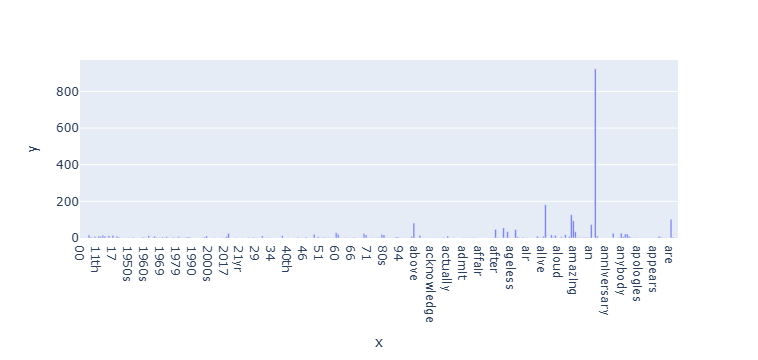

In [73]:
import plotly.express as px
px.bar(x=count_vect.get_feature_names_out()[:300],y=term_frequencies[:300])


**《Exercise 13》**

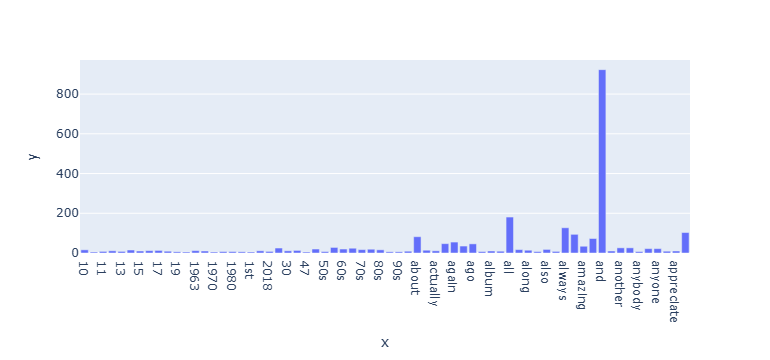

In [74]:
fre_ = pd.DataFrame({'term':count_vect.get_feature_names_out()[:300],'frequencies':term_frequencies[:300]})
new_fre_ = fre_[fre_['frequencies']>4]
px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])

**《Exercise 14》**

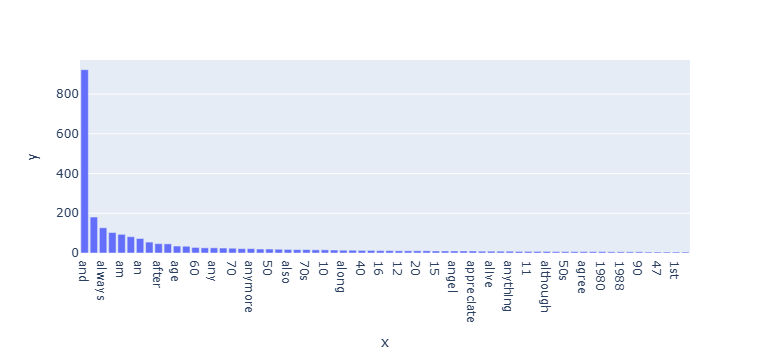

In [75]:
new_fre_=new_fre_.sort_values(['frequencies'],ascending=False) 
px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_44996\4082653373.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



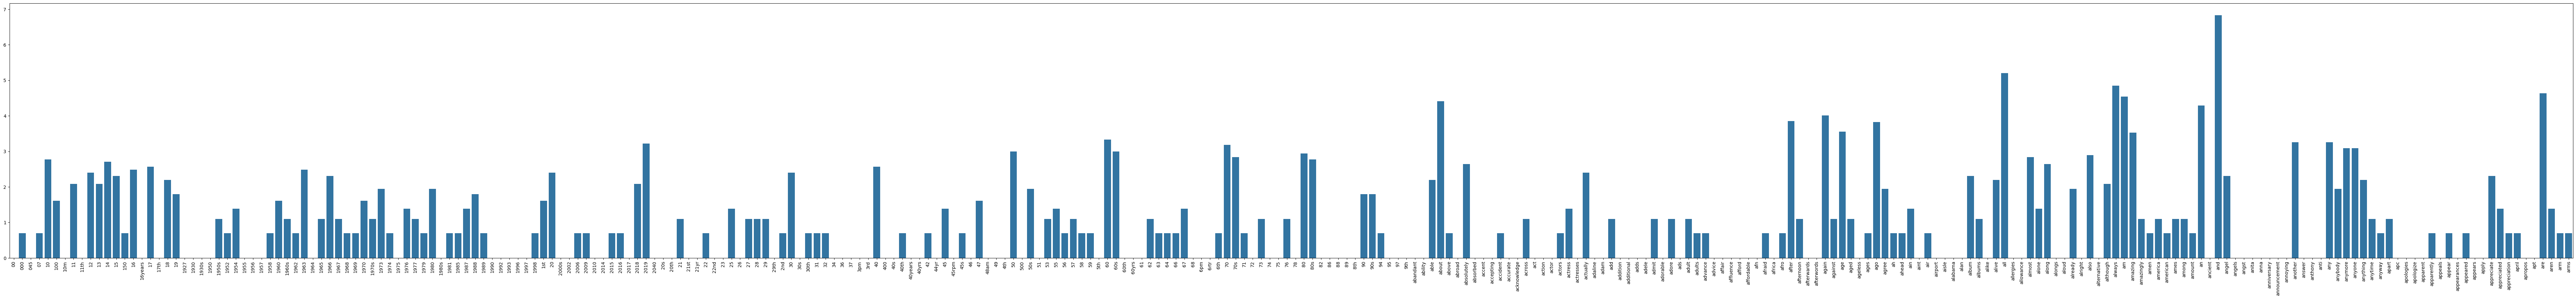

In [76]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

**《Exercise 15》**

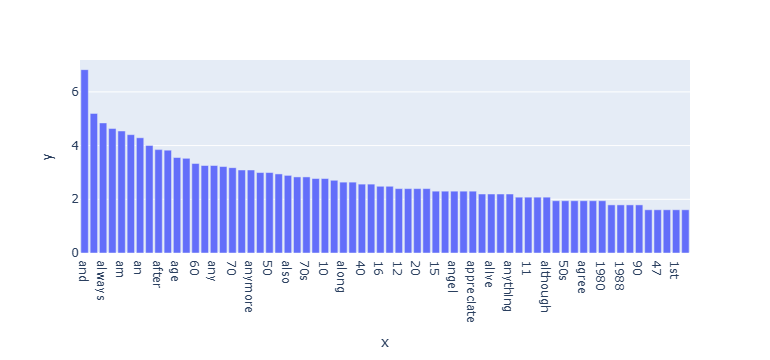

In [77]:
new_fre_['frequencies'] =[math.log(i) for i in new_fre_['frequencies']]
px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])

In [80]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#Create separate DataFrames for each category
categories = X['sentiment'].unique() # Get unique category labels
category_dfs = {} # Dictionary to store DataFrames for each category
for category in categories:
# Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()
    
# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer() # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment']) # Transform the text data into word counts
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df
    
# Create term-document frequency DataFrames for each category
term_document_dfs = {} # Dictionary to store term-document DataFrames for each category
for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [81]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
749   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  
748     1         0      0        0    0    0        0      0  
749     0         0      0        0    0    0        0      0  

[750 rows x 2602 columns]

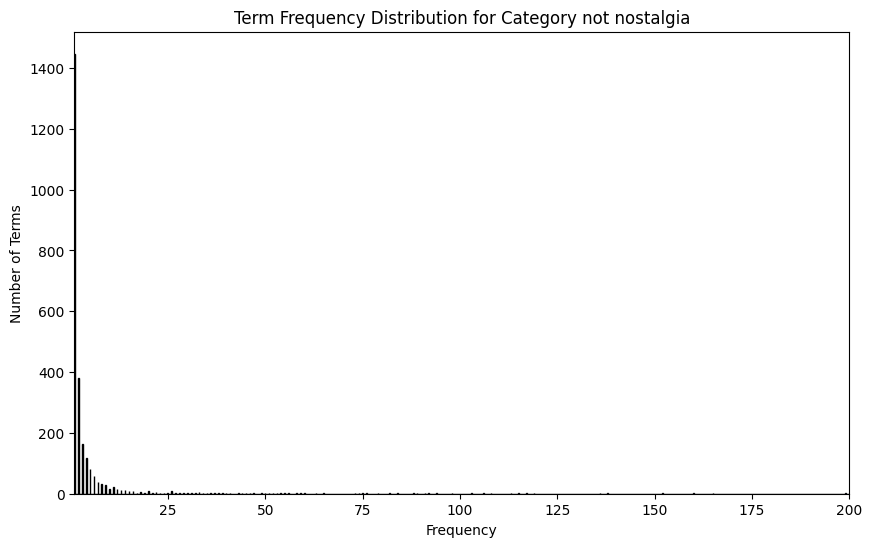

In [82]:
# Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [86]:
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts) # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1] # Sort frequencies in descending order
# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]
print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['00', 'graphics', 'granted', 'grannys', 'grandsons', 'grandma', 'grandfathers', 'grandchildren', 'grandchild', 'gramaphone', 'graffiti', 'grade', 'great', 'grace', 'got', 'goosebumps', 'goodnight', 'goodness', 'gone', 'gold', 'going', 'goes', 'glitter', 'glimpses', 'glass', 'grabbed', 'glasgow', 'greater', 'greats', 'happiest', 'happening', 'happened', 'hansen', 'hanging', 'hanged', 'hang', 'handball', 'hand', 'hall', 'hadn', 'greatest', 'guy', 'gulf', 'guitarist', 'guess', 'guardhouse', 'guaranteed', 'growing', 'group', 'grocery', 'griffiths', 'greg', 'green', 'gut', 'glad', 'giving', 'gives', 'fresh', 'freedom', 'free', 'francisco', 'frames', 'found', 'fossils', 'forwards', 'forward', 'form', 'fork', 'front', 'forgive', 'ford', 'for', 'fool', 'following', 'follow', 'flying', 'floyd', 'flowing', 'flower', 'flowed', 'florida', 'forehead', 'fulfill', 'fully', 'funerals', 'given', 'give', 'gift', 'gf', 'gets', 'germa

In [85]:
category_number=1 
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts) # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices] # Sort frequencies
# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)
# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]
# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]
print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['nicer', 'dc', 'if', 'ignore', 'ill', 'david', 'illicit', 'im', 'idea', 'images', 'imho', 'imitated', 'immediately', 'impeccable', 'impersonate', 'dark', 'impossible', 'imagine', 'deal', 'dean', 'iconized', 'hum']


In [87]:
category_number=0 #You can change it from 0 to 3
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)
    
# Apply the filtering function to each category
filtered_term_document_dfs = {}
for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category not nostalgia:


000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   
749    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  
749           0         0      0        0    0    0        0      0  

[750 rows x 2446 columns]

**《Exercise 16》**

In [ ]:
#Similarity:
#Common Words, The presence of common terms like "and," "or," and "the," which do not provide unique value to the analysis.
#Difference:
#alt.atheism category shows a blend of informal language and philosophical terms, reflecting personal experiences 
    #and broader discussions about belief, skepticism, and social interactions.
#Soc.religion.christian,Terms relate to theology, doctrine, scripture, and religious practices.
#Comp.graphics, Technical vocabulary related to computer graphics, programming, and design.
#In contrast, the sci.med category leans more towards technical and clinical language, with a focus on health and scientific discourse. 

In [92]:
#from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = DF2DB.DenseFormatDF(term_document_dfs[category])
    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(category_safe + '.csv','>=',1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


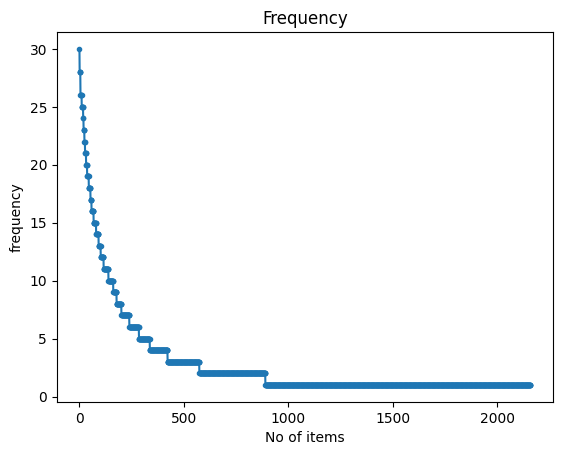

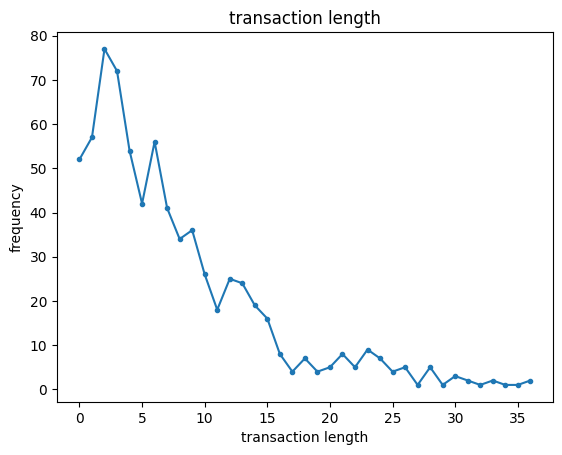

In [97]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.402144772117962
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.950348241365226
Variance in Transaction Sizes : 35.4541698904223
Sparsity : 0.9965649449010148


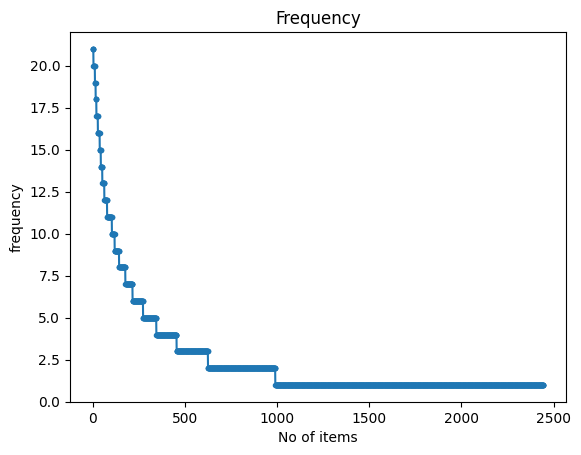

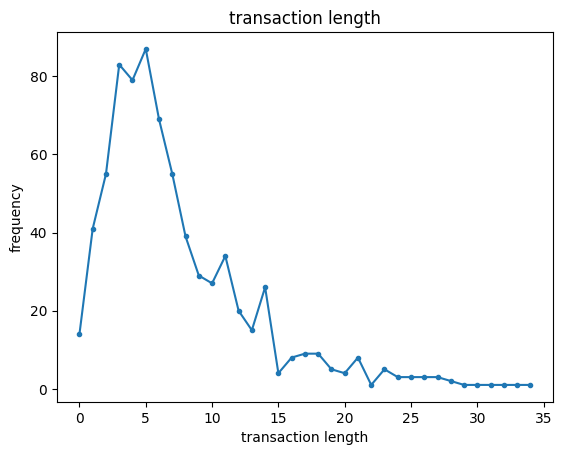

In [98]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [101]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.007978439331054688


In [102]:
obj2.save('nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [110]:
import pandas as pd
#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_soc_religion_christian]
# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1
# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)
# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)
# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)
# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
179  favorite       30
178        go       28
177      will       28
176     would       28
175      ever       28
..        ...      ...
12    records        9
13      place        9
14      right        9
15      karen        9
0        find        9

[180 rows x 2 columns]
Number of patterns discarded: 0


In [111]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment']) # X['text'] contains your text data
terms = count_vect.get_feature_names_out() # Original terms in the vocabulary
# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)
# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])
# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split()) # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  together  down  tv  \
0      0    0    0   0   0    0    0   0     0   0  ...         0     0   0   
1      0    0    0   0   0    0    0   0     0   0  ...         0     0   0   
2      0    0    0   0   0    0    0   0     0   0  ...         0     0   0   
3      0    0    0   0   0    0    0   0     0   0  ...         0     0   0   
4      0    0    0   0   0    0    0   0     0   0  ...         0     0   0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...       ...   ...  ..   
1495   0    0    0   0   0    0    0   0     0   0  ...         0     0   0   
1496   0    0    0   0   0    0    0   0     0   0  ...         0     0   0   
1497   0    0    0   0   0    0    0   0     0   0  ...         0     0   0   
1498   0    0    0   0   0    0    0   0     0   0  ...         0     0   0   
1499   0    0    0   0   0    0    0   0     0   0  ...         0     1   0   

      until  yes  records  place  right  karen  find  
0         0    0        0      0      0      0     0  
1         0    0        0      0      0      0     0  
2         0    0        0      0      0      0     1  
3         0    0        0      0      0      0     0  
4         0    0        0      0      0      0     0  
...     ...  ...      ...    ...    ...    ...   ...  
1495      0    0        0      0      0      0     0  
1496      0    0        0      0      0      0     0  
1497      0    0        0      0      0      0     0  
1498      0    0        0      0      0      0     0  
1499      0    0        0      0      0      0     0  

[1500 rows x 3910 columns]

**《Exercise 17》**

In [115]:
from PAMI.frequentPattern.topk import FAE as alg
K = 100
tp_obj_k500 = alg.FAE(iFile='nostalgia.csv', k=K)
tp_obj_k500.mine()
frequentPatternsDF_comp_graphics= tp_obj_k500.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(tp_obj_k500.getRuntime())) #measure the runtime

tp_obj_k500.save('nostalgia_topK_FAE_k100.txt') #save the patterns
frequentPatternsDF_comp_graphics

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.006364345550537109


Patterns  Support
0   favorite       30
1       ever       28
2      would       28
3       will       28
4         go       28
..       ...      ...
95     while       13
96      last       13
97        10       13
98      eyes       13
99    lyrics       13

[100 rows x 2 columns]

In [116]:
from PAMI.frequentPattern.topk import FAE as alg
K = 200
tp_obj_k1000 = alg.FAE(iFile='nostalgia.csv', k=K)
tp_obj_k1000.mine()
frequentPatternsDF_comp_graphics= tp_obj_k1000.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(tp_obj_k1000.getRuntime())) #measure the runtime

tp_obj_k1000.save('nostalgia_topK_FAE_k200.txt') #save the patterns
frequentPatternsDF_comp_graphics

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 200
Runtime: 0.014959573745727539


Patterns  Support
0    favorite       30
1        ever       28
2       would       28
3        will       28
4          go       28
..        ...      ...
195      mind        8
196   another        8
197    better        8
198        12        8
199     grade        8

[200 rows x 2 columns]

In [117]:
from PAMI.frequentPattern.topk import FAE as alg
K = 300
tp_obj_k1500 = alg.FAE(iFile='nostalgia.csv', k=K)
tp_obj_k1500.mine()
frequentPatternsDF_comp_graphics= tp_obj_k1500.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(tp_obj_k1500.getRuntime())) #measure the runtime

tp_obj_k1500.save('nostalgia_topK_FAE_k300.txt') #save the patterns
frequentPatternsDF_comp_graphics

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 300
Runtime: 0.02503657341003418


Patterns  Support
0         favorite       30
1             ever       28
2            would       28
3             will       28
4               go       28
..             ...      ...
295        go wish        6
296       go could        6
297          70 60        6
298  record player        6
299      know didn        6

[300 rows x 2 columns]

In [118]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

N = 3
max_obj_N3 = alg.MaxFPGrowth('nostalgia.csv', N)
max_obj_N3.mine()
frequentPatternsDF_comp_graphics= max_obj_N3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(max_obj_N3.getRuntime())) #measure the runtime

max_obj_N3.save('nostalgia_N3.txt') #save the patterns
frequentPatternsDF_comp_graphics

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 682
Runtime: 0.017953157424926758


Patterns  Support
0          skating         3
1           walker         3
2            scott         3
3          17 1987         3
4             stop         3
..              ...      ...
677      will such         4
678      ever only         3
679     would only         4
680       ever kid         3
681  favorite will         3

[682 rows x 2 columns]

In [119]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

N = 6
max_obj_N6 = alg.MaxFPGrowth('nostalgia.csv', N)
max_obj_N6.mine()
frequentPatternsDF_comp_graphics= max_obj_N6.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(max_obj_N6.getRuntime())) #measure the runtime

max_obj_N6.save('nostalgia_N6.txt') #save the patterns
frequentPatternsDF_comp_graphics

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 274
Runtime: 0.009972810745239258


Patterns  Support
0        1973         6
1     looking         6
2    actually         6
3        fast         6
4    innocent         6
..         ...      ...
269      only        26
270       kid        26
271     would        28
272      ever        28
273  favorite        30

[274 rows x 2 columns]

In [120]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

N = 9
max_obj_N9 = alg.MaxFPGrowth('nostalgia.csv', N)
max_obj_N9.mine()
frequentPatternsDF_comp_graphics= max_obj_N9.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(max_obj_N9.getRuntime())) #measure the runtime

max_obj_N9.save('nostalgia_N9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 176
Runtime: 0.006977081298828125


Patterns  Support
0       karen         9
1       right         9
2       place         9
3     records         9
4         yes         9
..         ...      ...
171        go        28
172      will        28
173     would        28
174      ever        28
175  favorite        30

[176 rows x 2 columns]

**《Exercise 17》=================================== Finish**

In [121]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

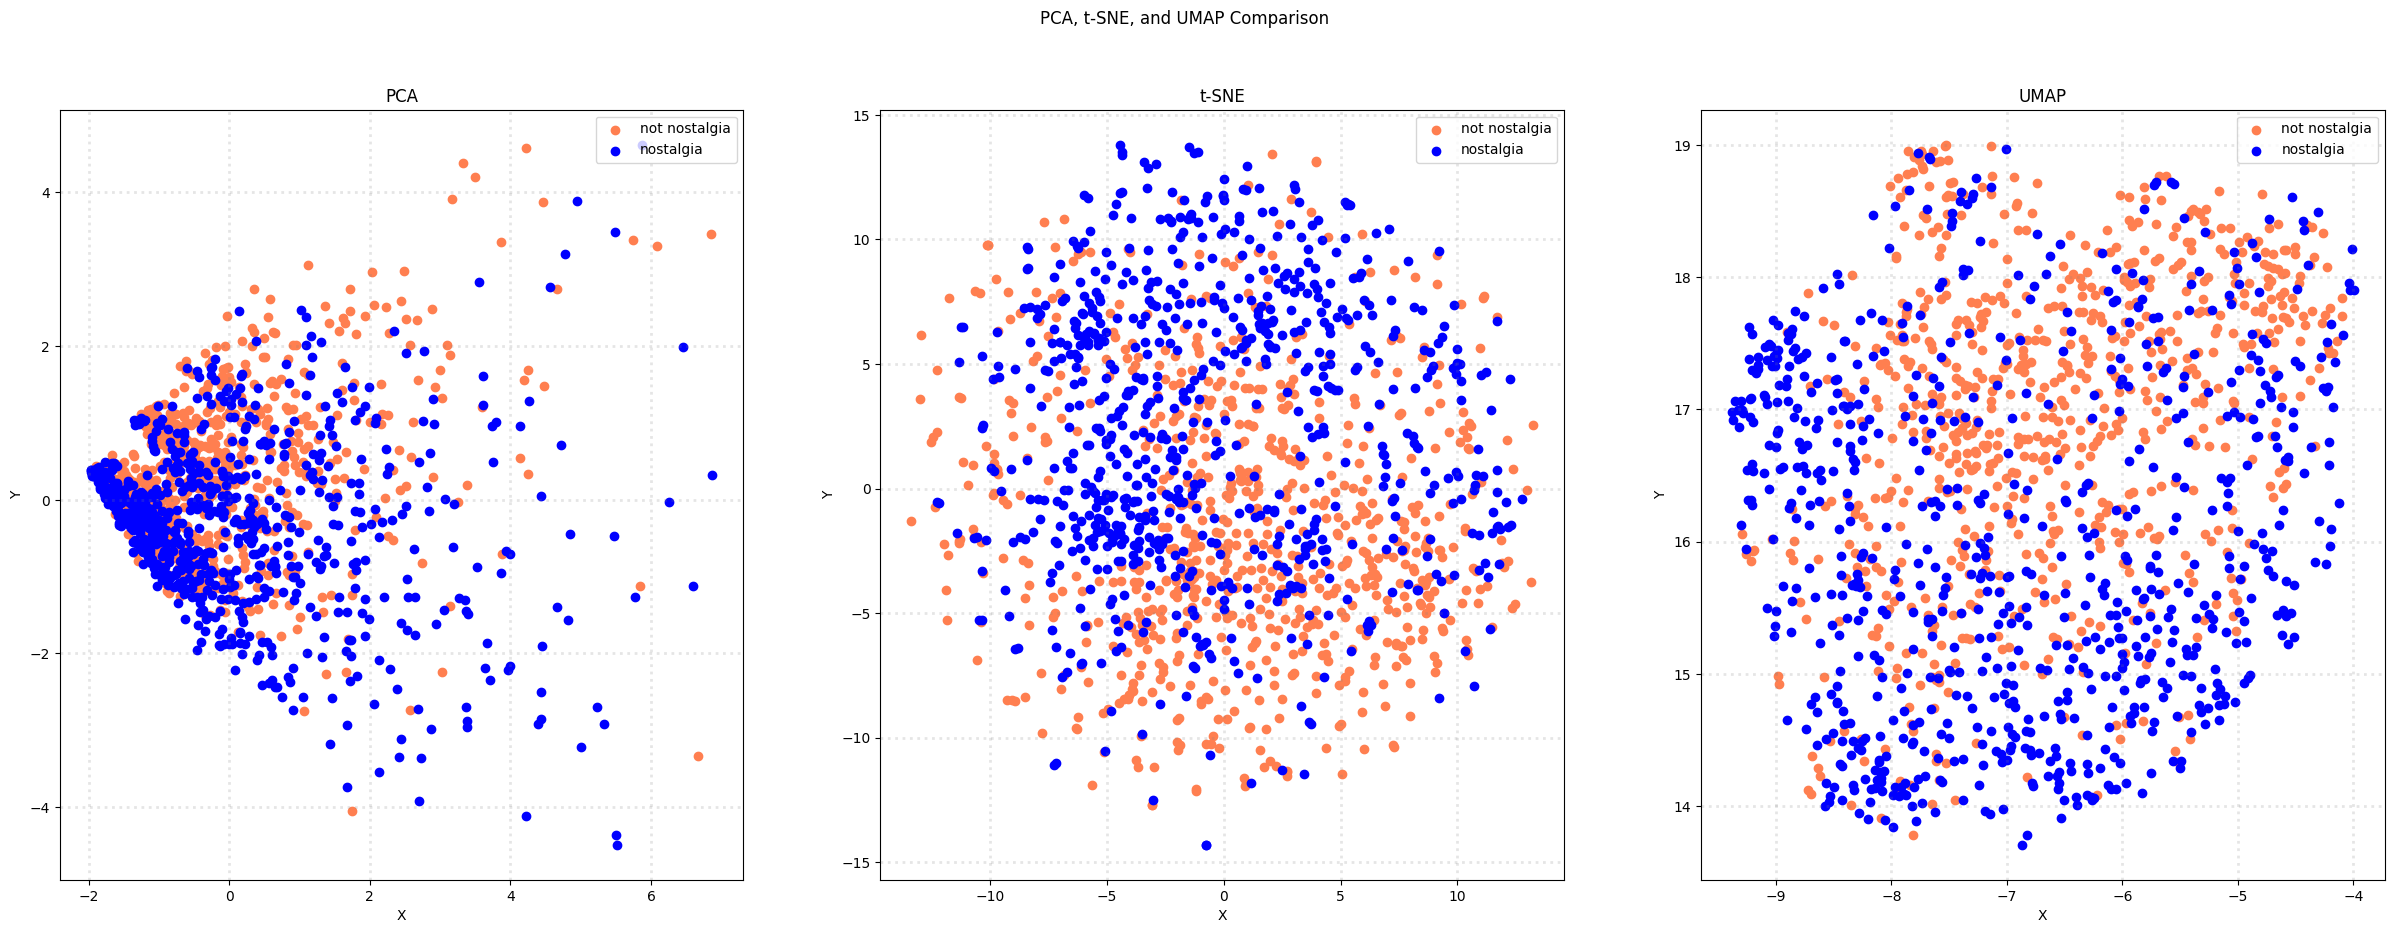

In [122]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()
fig, axes = plt.subplots(1, 3, figsize=(30, 10)) # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
        ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend(loc='upper right')
        
# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')
plt.show()

In [123]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

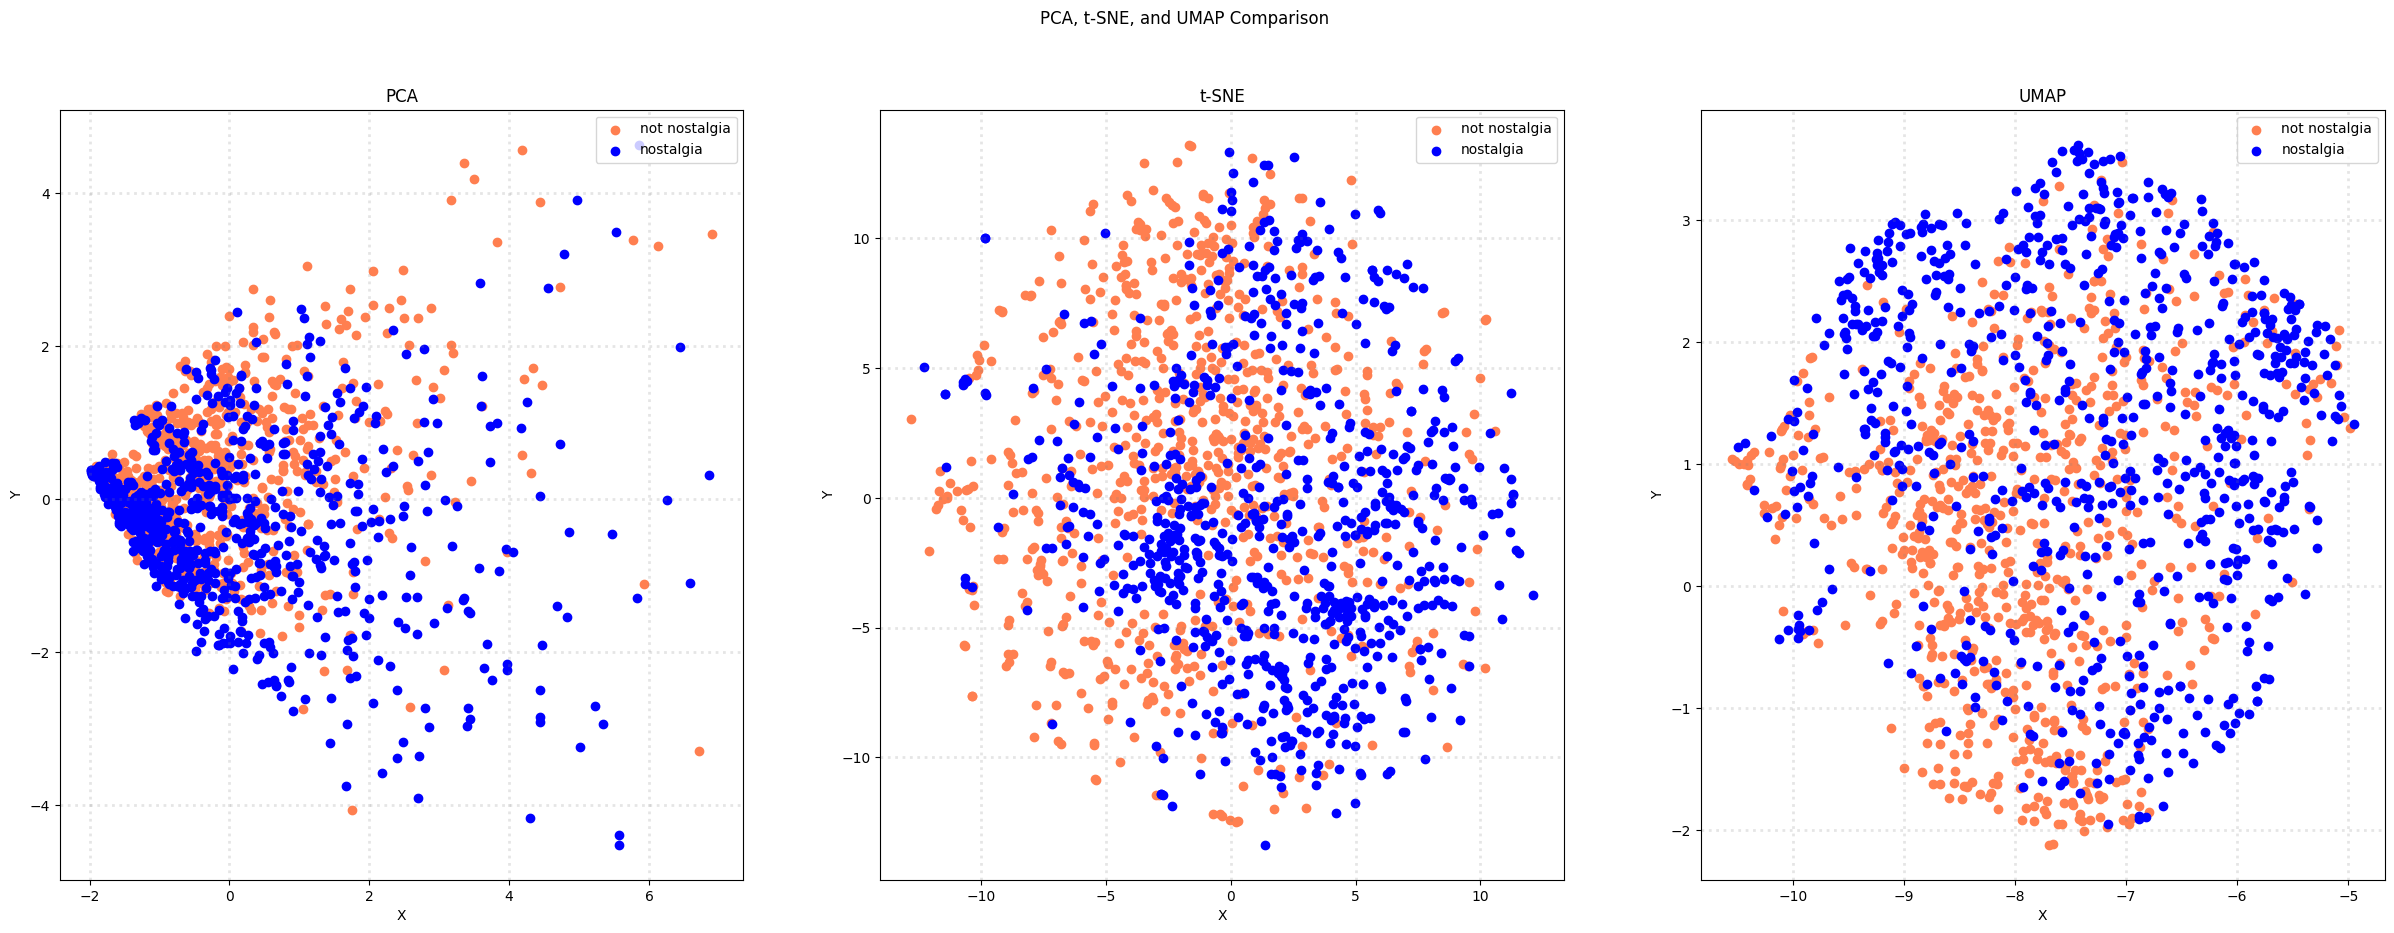

In [124]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()
fig, axes = plt.subplots(1, 3, figsize=(30, 10)) # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
        ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend(loc='upper right')
        
# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')
plt.show()

**《Exercise 18》**

In [125]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

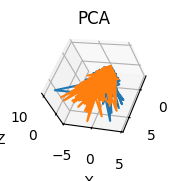

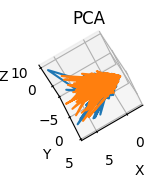

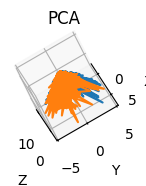

In [126]:
from mpl_toolkits.mplot3d import Axes3D

#ax = plt.axes(projection='3d')

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()
ax = plt.figure().add_subplot(3,2,1,projection='3d')

#fig, axes = plt.subplots(1, 3, figsize=(30, 10)) # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA 3D')
# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, xe, ye, ze):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        zs = X_reduced[X['sentiment'] == category].T[2]
        ax.plot(xs,ys,zs)
        #ax.contourf(sx,ys,zs,zdir='z',offset=-2)
        ax.view_init(elev=xe, azim=ye, roll=ze)
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        #ax.legend(loc='upper right')
        
# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(ax, X_pca_tdm, 'PCA', 45, 45 ,30)
ax = plt.figure().add_subplot(3,2,2,projection='3d')
plot_scatter(ax, X_pca_tdm, 'PCA',45, 90 ,30)
ax = plt.figure().add_subplot(3,2,3,projection='3d')
plot_scatter(ax, X_pca_tdm, 'PCA',45, 0 ,30)
plt.show()

In [127]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

LabelBinarizer()

In [128]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_sentiment  
0  {Jim, that, his, many, have, Lord, 16years, si...           [1]  
1  {his, singing, forgotten, love, listened, Neve...           [0]  
2  {smooth, how, voice,, songs., his, had, have, ...           [0]  
3  {me", that, have, 47, years, This, Thank, this...           [1]  
4  {to, of, his, listening, me, my, him, songs, r...           [0]  
5  {Jim, that, many, RIP, death,, as, this, souls...           [0]  
6  {Jim, how, loved, listening, My, didn't, Reeve...           [0]  
7  {Jim, his, since, HAVE, i, now, he, LISTENED, ...           [0]  
8        {you, are, my, Wherever, heart, always, in}           [1]

**《Exercise 19》**

In [129]:
mlb_name = preprocessing.LabelBinarizer()

mlb_name.fit(X.sentiment)
mlb_name.transform(X['sentiment']).tolist()

[[1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0]

In [130]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)
document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)
document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [131]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [132]:
from sklearn.preprocessing import binarize
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)
# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)
# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [133]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\yuyulu\AppData\Local\Temp\ipykernel_44996\3451280700.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_44996\3451280700.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_44996\3451280700.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\yuyulu\AppData\Local\Temp\ipykernel_44996\3451280700.py:13: DeprecationWarning:

Conversion of an array with ndim >

In [141]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
# Create a mapping from numerical labels to category names
#category_mapping = dict(X['sentiment'].drop_duplicates().values)
# Convert the numerical category labels to text labels
#target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [205]:
y_train

485     not nostalgia
527     not nostalgia
199         nostalgia
889         nostalgia
844     not nostalgia
            ...      
1130        nostalgia
1294        nostalgia
860         nostalgia
1459        nostalgia
1126        nostalgia
Name: sentiment, Length: 1050, dtype: object

In [142]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7917    0.9289    0.8548       225
not nostalgia     0.9140    0.7556    0.8273       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [212]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

In [213]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8377777777777777

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7901    0.9200    0.8501       225
not nostalgia     0.9043    0.7556    0.8232       225

     accuracy                         0.8378       450
    macro avg     0.8472    0.8378    0.8367       450
 weighted avg     0.8472    0.8378    0.8367       450



**Visualization (third)** : print out the most common word in both two sentiment.

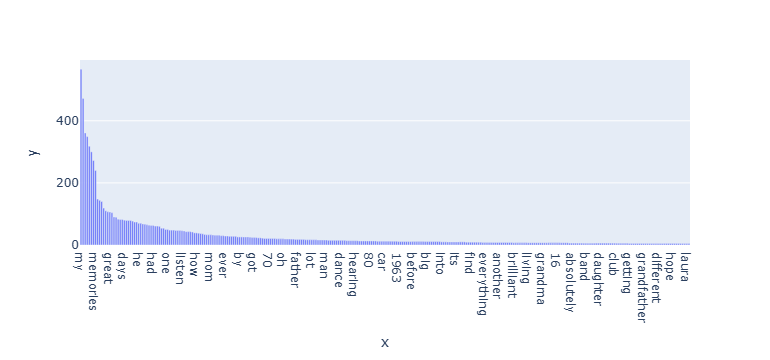

In [185]:
X_counts = count_vect.fit_transform(X[X['sentiment']=='not nostalgia'].comment)
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fre_ = pd.DataFrame({'term':count_vect.get_feature_names_out()[:1500],'frequencies':term_frequencies[:1500]})
new_fre_1 = fre_[fre_['frequencies']>4]
#px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])
new_fre_1=new_fre_1.sort_values(['frequencies'],ascending=False) 
px.bar(x=new_fre_1['term'],y=new_fre_1['frequencies'])

X_counts = count_vect.fit_transform(X[X['sentiment']=='nostalgia'].comment)
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fre_ = pd.DataFrame({'term':count_vect.get_feature_names_out()[:1500],'frequencies':term_frequencies[:1500]})
new_fre_2 = fre_[fre_['frequencies']>4]
#px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])
new_fre_2=new_fre_2.sort_values(['frequencies'],ascending=False) 
px.bar(x=new_fre_2['term'],y=new_fre_2['frequencies'])

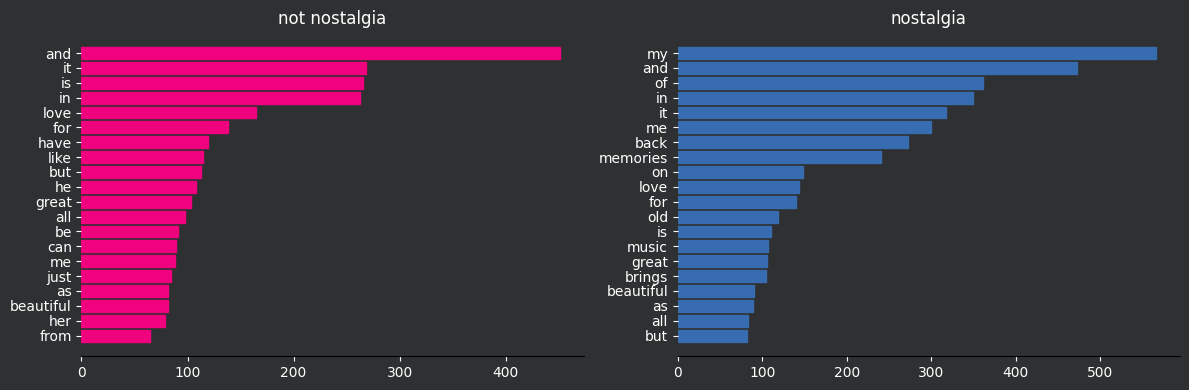

In [186]:
thacher_10 =new_fre_1.iloc[:20]
otis_10 = new_fre_2.iloc[:20]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))

# horizontal barplot:

ax1.barh(thacher_10["term"], thacher_10["frequencies"], 
        color = "#f0027f", 
        edgecolor = "#f0027f")

ax2.barh(otis_10["term"], otis_10["frequencies"], 
        color = "#386cb0", 
        edgecolor = "#386cb0")



# title:
ax1.set_title("not nostalgia")
ax2.set_title("nostalgia")

# iterate over ax1, ax2, ax3 to: 
# invert the y axis;
# eliminate grid;
# set fonts and background colors;
# eliminate spines;
for ax in fig.axes:                             
    ax.invert_yaxis()                           
    ax.grid(False)                              
    ax.title.set_color('white')                 
    ax.tick_params(axis='x', colors='white')    
    ax.tick_params(axis='y', colors='white')    
    ax.set_facecolor('#2E3031')                 
    ax.spines["top"].set_visible(False)         
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

# fig background color:
fig.patch.set_facecolor('#2E3031')
# layout:
fig.tight_layout()

plt.show()

**TF-IDF features(third)**

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

_vectorizer = TfidfVectorizer()
_vectorized_data = _vectorizer.fit_transform(X.comment)

term_frequencies = []
for j in range(0,_vectorized_data.shape[1]):
    term_frequencies.append(sum(_vectorized_data[:,j].toarray()))
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]
term_frequencies = np.asarray(_vectorized_data.sum(axis=0))[0]

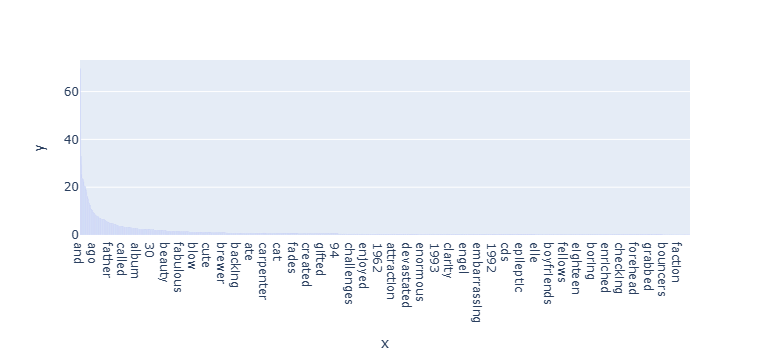

In [196]:
fre_4 = pd.DataFrame({'term':_vectorizer.get_feature_names_out()[:1500],'frequencies':term_frequencies[:1500]})
new_fre_4 = fre_4[fre_4['frequencies']>0.01]
#px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])
new_fre_4=new_fre_4.sort_values(['frequencies'],ascending=False) 
px.bar(x=new_fre_4['term'],y=new_fre_4['frequencies'])

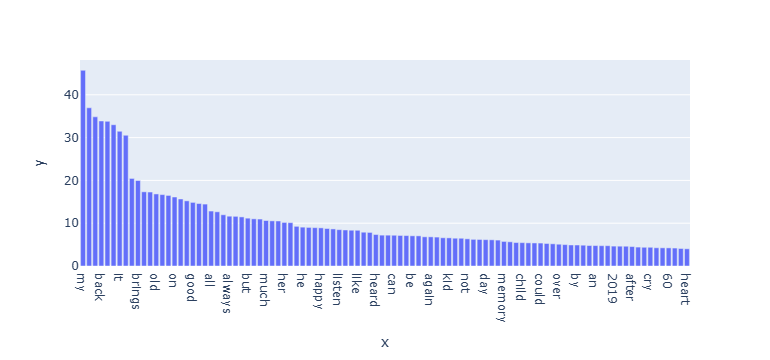

In [197]:
_X_counts = _vectorizer.fit_transform(X[X['sentiment']=='not nostalgia'].comment)
term_frequencies = []
for j in range(0,_X_counts.shape[1]):
    term_frequencies.append(sum(_X_counts[:,j].toarray()))
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]
term_frequencies = np.asarray(_X_counts.sum(axis=0))[0]

fre_ = pd.DataFrame({'term':_vectorizer.get_feature_names_out()[:1500],'frequencies':term_frequencies[:1500]})
new_fre_1 = fre_[fre_['frequencies']>4]
#px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])
new_fre_1=new_fre_1.sort_values(['frequencies'],ascending=False) 
px.bar(x=new_fre_1['term'],y=new_fre_1['frequencies'])

_X_counts = _vectorizer.fit_transform(X[X['sentiment']=='nostalgia'].comment)
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(_X_counts[:,j].toarray()))
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]
term_frequencies = np.asarray(_X_counts.sum(axis=0))[0]

fre_ = pd.DataFrame({'term':_vectorizer.get_feature_names_out()[:1500],'frequencies':term_frequencies[:1500]})
new_fre_2 = fre_[fre_['frequencies']>4]
#px.bar(x=new_fre_['term'],y=new_fre_['frequencies'])
new_fre_2=new_fre_2.sort_values(['frequencies'],ascending=False) 
px.bar(x=new_fre_2['term'],y=new_fre_2['frequencies'])

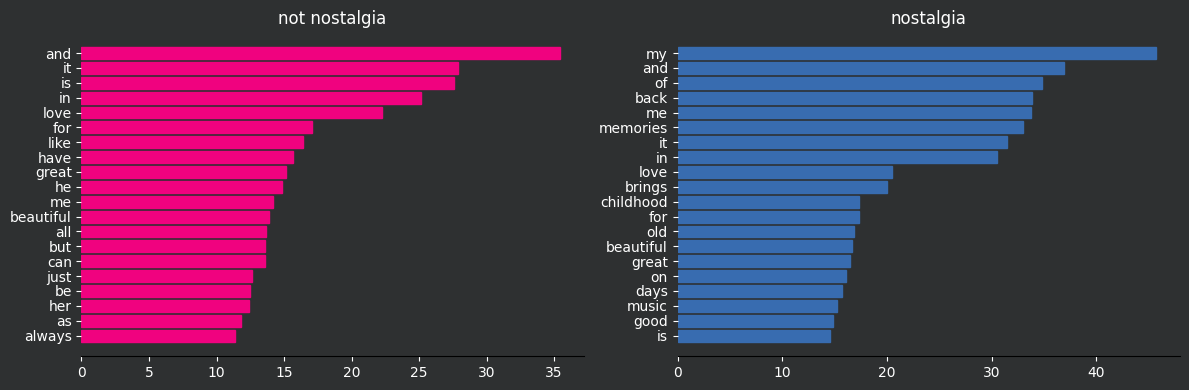

In [198]:
thacher_10 =new_fre_1.iloc[:20]
otis_10 = new_fre_2.iloc[:20]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))

# horizontal barplot:

ax1.barh(thacher_10["term"], thacher_10["frequencies"], 
        color = "#f0027f", 
        edgecolor = "#f0027f")

ax2.barh(otis_10["term"], otis_10["frequencies"], 
        color = "#386cb0", 
        edgecolor = "#386cb0")



# title:
ax1.set_title("not nostalgia")
ax2.set_title("nostalgia")

# iterate over ax1, ax2, ax3 to: 
# invert the y axis;
# eliminate grid;
# set fonts and background colors;
# eliminate spines;
for ax in fig.axes:                             
    ax.invert_yaxis()                           
    ax.grid(False)                              
    ax.title.set_color('white')                 
    ax.tick_params(axis='x', colors='white')    
    ax.tick_params(axis='y', colors='white')    
    ax.set_facecolor('#2E3031')                 
    ax.spines["top"].set_visible(False)         
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

# fig background color:
fig.patch.set_facecolor('#2E3031')
# layout:
fig.tight_layout()

plt.show()

**Naive Bayes classifier**

In [210]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert 'text' column into term-document matrix using CountVectorizer

_X_tdm = _vectorizer.fit_transform(X['comment']) # X['text'] contains your text data
_terms = _vectorizer.get_feature_names_out() # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)
# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])
# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split()) # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
_tdm_df = pd.DataFrame(_X_tdm.toarray(), columns=_terms, index=X.index)
# Concatenate the original TDM and the pattern matrix to augment the features
_augmented_df = pd.concat([_tdm_df, pattern_matrix], axis=1)
_augmented_df

00  000  045   07   10  100  10m   11  11th   12  ...  together  down  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...       ...   ...   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     0   
1499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0     1   

      tv  until  yes  records  place  right  karen  find  
0      0      0    0        0      0      0      0     0  
1      0      0    0        0      0      0      0     0  
2      0      0    0        0      0      0      0     1  
3      0      0    0        0      0      0      0     0  
4      0      0    0        0      0      0      0     0  
...   ..    ...  ...      ...    ...    ...    ...   ...  
1495   0      0    0        0      0      0      0     0  
1496   0      0    0        0      0      0      0     0  
1497   0      0    0        0      0      0      0     0  
1498   0      0    0        0      0      0      0     0  
1499   0      0    0        0      0      0      0     0  

[1500 rows x 3910 columns]

In [214]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
# Create a mapping from numerical labels to category names
#category_mapping = dict(X['sentiment'].drop_duplicates().values)
# Convert the numerical category labels to text labels
#target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(_tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [215]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8488888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7985    0.9333    0.8607       225
not nostalgia     0.9198    0.7644    0.8350       225

     accuracy                         0.8489       450
    macro avg     0.8591    0.8489    0.8478       450
 weighted avg     0.8591    0.8489    0.8478       450



In [216]:
X_train, X_test, y_train, y_test = train_test_split(_augmented_df, X['sentiment'], test_size=0.3, random_state=42)

In [217]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8311111111111111

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7922    0.8978    0.8417       225
not nostalgia     0.8821    0.7644    0.8190       225

     accuracy                         0.8311       450
    macro avg     0.8371    0.8311    0.8304       450
 weighted avg     0.8371    0.8311    0.8304       450

